In [1]:
import pandas as pd
import catboost
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from evaluation import get_cm_sklearn, print_metrics
from preprocessing import TrainingPreProcessor

RANDOM_STATE = 0

train_set = pd.read_csv("input/train.csv")

training_preprocessor = TrainingPreProcessor()
training_preprocessor.fit(train_set, ignore_columns=["CLIENTNUM"])

X, y = training_preprocessor.transform(train_set)
class_weight = training_preprocessor.class_weight

In [2]:
catboost_model = catboost.CatBoostClassifier(
    random_state=RANDOM_STATE,
    class_weights=class_weight,
)

## Grid search

In [3]:
kfold = StratifiedKFold(3, shuffle=True, random_state=RANDOM_STATE)
grid_parameters = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "iterations": [10, 30, 50, 100, 300, 500],
}

In [4]:
grid_search = GridSearchCV(
    catboost_model,
    grid_parameters,
    scoring="balanced_accuracy",
    cv=kfold,
    verbose=3,
    n_jobs=-1,
)

In [5]:
grid_search.fit(
    X, y  
)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0:	learn: 0.6457202	total: 150ms	remaining: 44.9s
1:	learn: 0.5998631	total: 155ms	remaining: 23.1s
2:	learn: 0.5620370	total: 159ms	remaining: 15.8s
3:	learn: 0.5271172	total: 164ms	remaining: 12.1s
4:	learn: 0.4996344	total: 168ms	remaining: 9.94s
5:	learn: 0.4762069	total: 173ms	remaining: 8.48s
6:	learn: 0.4543191	total: 177ms	remaining: 7.4s
7:	learn: 0.4325027	total: 181ms	remaining: 6.6s
8:	learn: 0.4160071	total: 186ms	remaining: 6s
9:	learn: 0.4013742	total: 191ms	remaining: 5.53s
10:	learn: 0.3901922	total: 195ms	remaining: 5.12s
11:	learn: 0.3763558	total: 200ms	remaining: 4.79s
12:	learn: 0.3672238	total: 204ms	remaining: 4.51s
13:	learn: 0.3597148	total: 208ms	remaining: 4.26s
14:	learn: 0.3497061	total: 212ms	remaining: 4.03s
15:	learn: 0.3378960	total: 217ms	remaining: 3.85s
16:	learn: 0.3305672	total: 222ms	remaining: 3.69s
17:	learn: 0.3223792	total: 226ms	remaining: 3.54s
18:	learn: 0.3160604	total: 230ms	r

In [6]:
# {'iterations': 300, 'learning_rate': 0.05, 'max_depth': 5}
best_model = grid_search.best_estimator_ 

In [7]:
best_model.fit(X, y)

0:	learn: 0.6457202	total: 4.22ms	remaining: 1.26s
1:	learn: 0.5998631	total: 9.38ms	remaining: 1.4s
2:	learn: 0.5620370	total: 13.9ms	remaining: 1.37s
3:	learn: 0.5271172	total: 18.1ms	remaining: 1.34s
4:	learn: 0.4996344	total: 22.2ms	remaining: 1.31s
5:	learn: 0.4762069	total: 27.9ms	remaining: 1.37s
6:	learn: 0.4543191	total: 33.5ms	remaining: 1.4s
7:	learn: 0.4325027	total: 38.5ms	remaining: 1.41s
8:	learn: 0.4160071	total: 43.3ms	remaining: 1.4s
9:	learn: 0.4013742	total: 48.2ms	remaining: 1.4s
10:	learn: 0.3901922	total: 52.6ms	remaining: 1.38s
11:	learn: 0.3763558	total: 59.3ms	remaining: 1.42s
12:	learn: 0.3672238	total: 65.4ms	remaining: 1.44s
13:	learn: 0.3597148	total: 69.9ms	remaining: 1.43s
14:	learn: 0.3497061	total: 74ms	remaining: 1.41s
15:	learn: 0.3378960	total: 78.8ms	remaining: 1.4s
16:	learn: 0.3305672	total: 84.2ms	remaining: 1.4s
17:	learn: 0.3223792	total: 89.2ms	remaining: 1.4s
18:	learn: 0.3160604	total: 93.9ms	remaining: 1.39s
19:	learn: 0.3093247	total: 98.

In [8]:
test_set = pd.read_csv("input/test.csv")
X_test, y_test = training_preprocessor.transform(test_set)

### Avaliação do encontrado

Accuracy: 0.9624876604146101
Balanced Accuracy: 0.9591124838680065
F1: 0.9773269689737469
RoC AuC: 0.9591124838680066


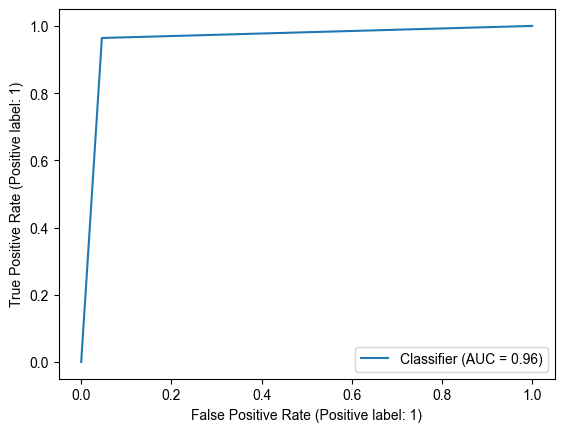

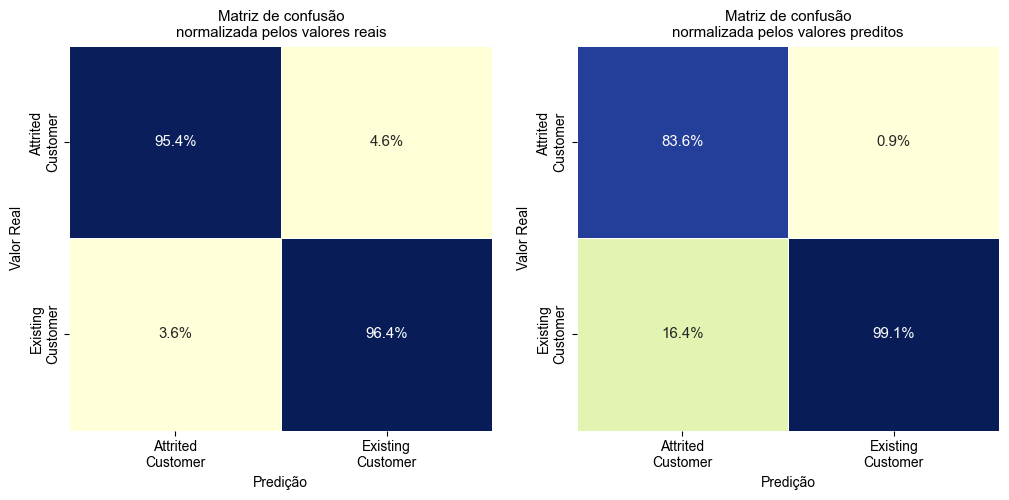

In [9]:
y_pred_test = best_model.predict(X_test)

print_metrics(y_test, y_pred_test)

get_cm_sklearn(
    y_test,
    y_pred_test,
    labels=[
        "\n".join(label.split())
        for label in training_preprocessor.label_encoder.classes_
    ],
)